In [1]:
from langgraph.graph import StateGraph, START, END
import random
from typing import Dict, TypedDict, List

In [2]:
class AgentState(TypedDict):
    name: str
    number: List[int]
    counter: int

In [3]:
def greeting_node(state: AgentState) -> AgentState:
    """Greeting node which says hi to the person."""
    state['name'] = f"Hi,There , {state['name']}!"
    state['counter'] = 0

    return state


def random_node(state: AgentState) -> AgentState:
    """Random number generator node generates number from 1 to 10."""
    state['number'].append(random.randint(1, 10))
    state['counter'] += 1

    return state

def should_continue(state: AgentState) -> bool:
    """Function to decide what to do   next."""
    if state['counter'] < 5:
        return "loop"
    else:
        return "exit"
    
    

In [4]:
graph = StateGraph(AgentState)

graph.add_node("greeting", greeting_node)
graph.add_node("random", random_node)
graph.add_edge("greeting", "random")


graph.add_conditional_edges(
    "random",
    should_continue,
    {
        "loop": "random",
        "exit": END,
    },
   
)

graph.set_entry_point("greeting")

app = graph.compile()

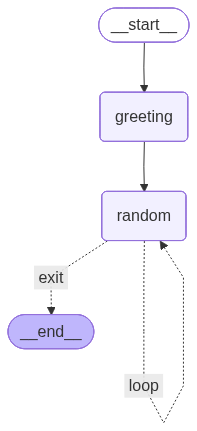

In [5]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [10]:
app.invoke({
    "name": "Alice",
    "number": [],
    "counter": -100,
    })

{'name': 'Hi,There , Alice!', 'number': [4, 4, 2, 4, 6], 'counter': 5}